In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cohort_num=18

In [3]:
import os
import pickle

if os.path.isfile('/Users/lemur/cohorts/cohort{}.pkl'.format(cohort_num)):
    with open('/Users/lemur/cohorts/cohort{}.pkl'.format(cohort_num)) as f:
        students = pickle.load(f)
else:
    with open('/Users/lemur/cohorts/cohort{}.txt'.format(cohort_num)) as f:
        s = f.read()
        students = [l.split(',')[-1] for l in s.split('\n')]
        
def rs(s=students):
    if isinstance(s,dict):
        name = np.random.choice(s.keys())
        print name
        student = s[name]
    else:
        student = np.random.choice(s)
    return student

In [15]:
rs()

'Manasa Chinthakuntla'

In [16]:
def make_sim_data(x=None, y=1000, f = lambda x: 1 + 1 * np.sin(x)):
    if x is None:
        x=np.linspace(-np.pi, np.pi ,y)
    return f(x) + np.random.normal(scale=0.3, size=y)

In [17]:
def set_ax_prop(ax, j=None, modifier=15, iter_num=5, max_size=25, set_xlims=True, legend=False, add_text=True):
    ax.grid(True, color='white', linestyle='-')
    ax.set_axis_bgcolor('0.75')
    [t.set_color('white') for t in ax.xaxis.get_ticklines()]
    [t.set_color('white') for t in ax.yaxis.get_ticklines()]
    if set_xlims:
        ax.set_xlim(-np.pi,np.pi)
    ax.set_axisbelow(True)
    if j is not None:
        if j % iter_num != 0:
            ax.set_yticklabels('')
        if j < (max_size-iter_num):
            ax.set_xticklabels('')
    if add_text:        
        ax.text(-2.8, max(ax.get_ylim())*.85, str(int(j*modifier)))
    if legend:
        ax.legend()

In [18]:
def make_grid(total, step_size):
    num_to_make = np.floor(total/float(step_size))
    r = int(np.sqrt(num_to_make))
    c = int(np.ceil(num_to_make/r))
    return r, c

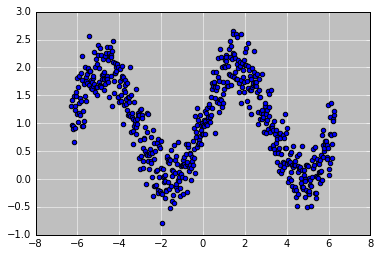

In [19]:
size = 600
a, b = 1, 1
gen_func = lambda x: a + b * np.sin(x)
x = np.linspace(-2*np.pi,2*np.pi,size)
y = make_sim_data(x, size, gen_func)
x = x.reshape(x.shape[0],1)
y = y.reshape(y.shape[0],1)
fig, ax = plt.subplots(1,1)
ax.scatter(x,y)
set_ax_prop(ax, set_xlims=0, add_text=False)

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
def basic_booster(X, y, prev=None, l=1, depth=1):
    if prev is None:
        return lambda x: np.repeat(np.mean(y),X.shape[0]).reshape(-1,1)
    cur_model = DecisionTreeRegressor(max_depth=depth).fit(X, y - prev(X))
    return lambda x: prev(x) + (l * cur_model.predict(x)).reshape(-1,1)

In [40]:
f0 = basic_booster(x, y)

In [41]:
f1 = basic_booster(x, y, f0)

In [42]:
f2 = basic_booster(x, y, f1)

In [36]:
def plot_model(ax, model, x, y, gen_func, alpha=1):
    s = ax.scatter(x, y, color='purple', alpha=0.2)
    line1 = ax.plot(x, gen_func(x), color='k', lw=4)
    line2 = ax.plot(x, model(x), color='r', alpha=alpha, lw=4)
    return [s] + [line1] + [line2]

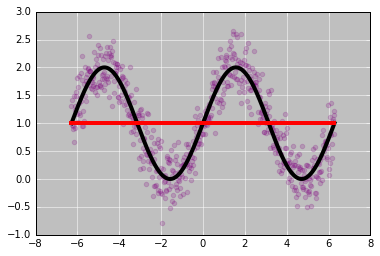

In [37]:
fig, ax = plt.subplots(1,1)
plot_model(ax, f0, x, y, gen_func)
set_ax_prop(ax, set_xlims=False, add_text=False)

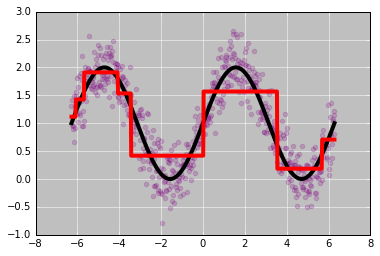

In [38]:
fig, ax = plt.subplots(1,1)
plot_model(ax, f1, x, y, gen_func)
set_ax_prop(ax, set_xlims=False, add_text=False)

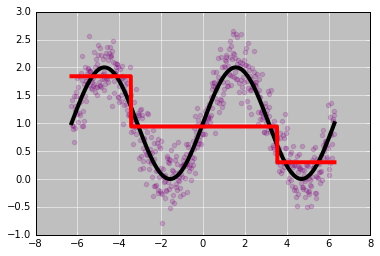

In [29]:
fig, ax = plt.subplots(1,1)
plot_model(ax, f2, x, y, gen_func)
set_ax_prop(ax, set_xlims=False, add_text=False)

In [30]:
def build_boosted_model(X, y, n=120, l=1):
    models = [basic_booster(X,y,None,l)]
    for _ in xrange(n-1):
        models.append(basic_booster(X,y,models[-1],l))
    return models

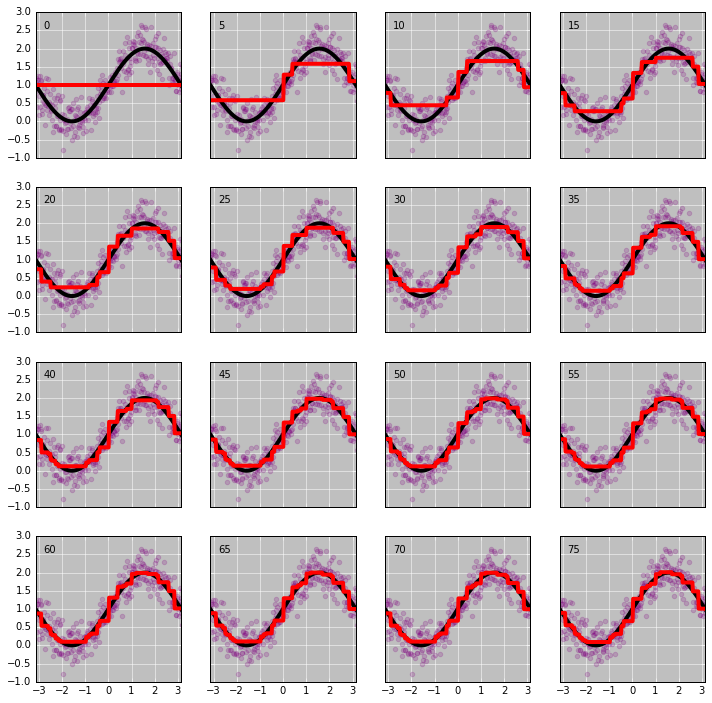

In [31]:
num_runs = 80
check_num = 5.
r, c = make_grid(num_runs, check_num)
fig, ax_list = plt.subplots(r,c,figsize=(12, 12))
axes = ax_list.flatten()

m = build_boosted_model(x, y, num_runs)
j = 0
check_points = set(map(int, np.linspace(0,num_runs, r*c, endpoint=False)))
for i,model in enumerate(m):
    if i in check_points:
        plot_model(axes[j], model, x, y, gen_func)
        set_ax_prop(axes[j], j, check_num, c, r*c)
        j += 1

In [43]:
np.sum((y - m[-1](x))**2)

47.059747470343197

In [44]:
np.sum((gen_func(x) - m[-1](x))**2)

7.5945074686936023

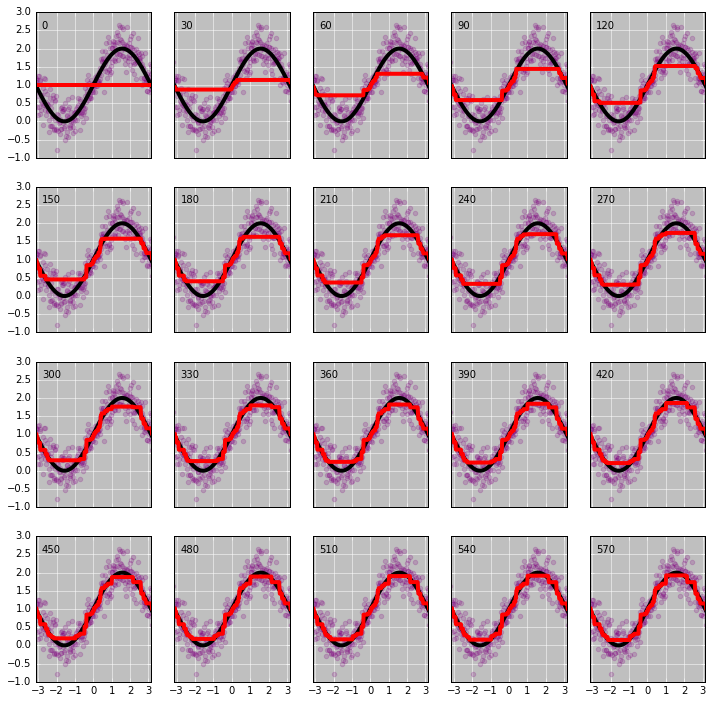

In [46]:
num_runs = 600
check_num = 30.
r, c = make_grid(num_runs, check_num)
fig, ax_list = plt.subplots(r, c, figsize=(12, 12))
axes = ax_list.flatten()

m = build_boosted_model(x, y, num_runs, l=0.1)
j = 0
check_points = set(map(int, np.linspace(0,num_runs, r*c, endpoint=False)))
for i,model in enumerate(m):
    if i in check_points:
        plot_model(axes[j], model, x, y, gen_func)
        set_ax_prop(axes[j], j, check_num, c, r*c)
        j += 1

In [47]:
np.sum((y - m[-1](x))**2)

45.363347125103282

In [48]:
np.sum((gen_func(x) - m[-1](x))**2)

4.8773387602143741

In [50]:
rs()

'Brian Lewis'

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
def plot_data(ax, x, y, gen_func):
    s = ax.scatter(x, y, color='b', alpha=0.2)
    line1 = ax.plot(x, gen_func(x), color='k', lw=4)
    return [s] + [line1]

In [53]:
def plot_staged(ax, vals, x, alpha=1):
    line2 = ax.plot(x, vals, color='r', alpha=alpha, lw=4)
    return [line2]

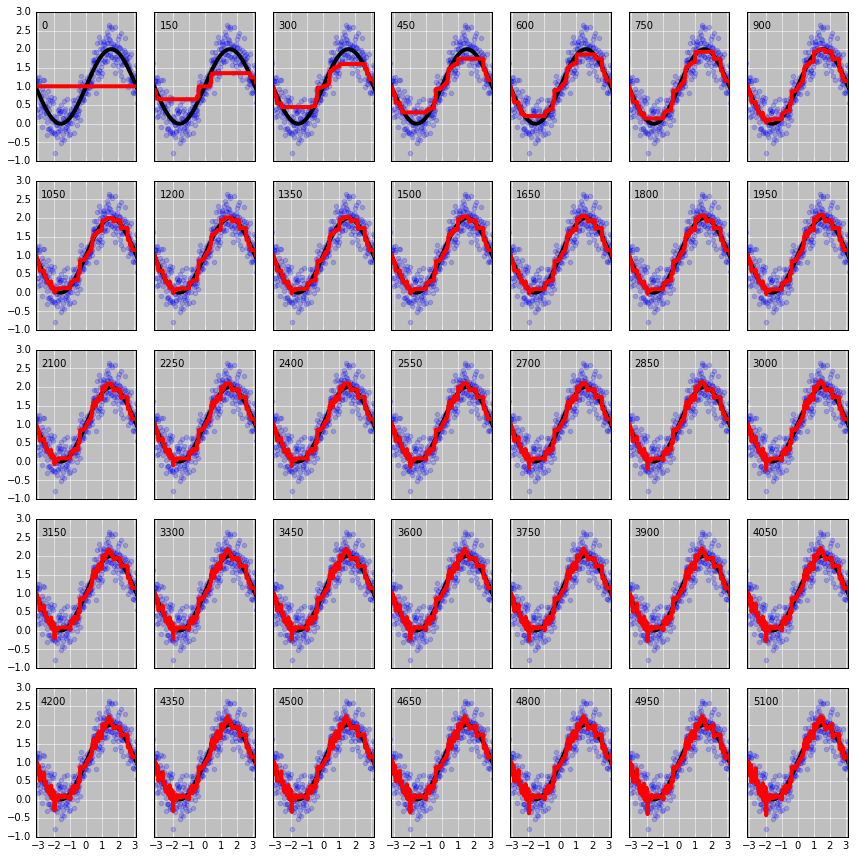

In [56]:
num_runs = 5000
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=num_runs, max_depth=2)
gbr.fit(x,y.reshape(-1,))

check_num = 150.
r, c = make_grid(num_runs, check_num)
fig, ax_list = plt.subplots(r,c,figsize=(12, 12))
axes = ax_list.flatten()
j = 0
check_points = set(map(int, np.linspace(0,num_runs, r*c, endpoint=False)))
for i, result in enumerate(gbr.staged_predict(x)):
    if i in check_points:
        plot_data(axes[j], x, y, gen_func)
        plot_staged(axes[j], result, x)
        set_ax_prop(axes[j], j, check_num, c, r*c)
        j += 1
plt.tight_layout()

In [58]:
rs()

'Brian Lewis'

In [55]:
def plot_error(ax, model, x, y, **kwargs):
    y_vals = ((y.T - np.array(list(model.staged_predict(x))))**2).sum(axis=1)
    ax.plot(y_vals, **kwargs)

In [59]:
test_data = make_sim_data(x.reshape(-1,), size, gen_func).reshape(-1,1)

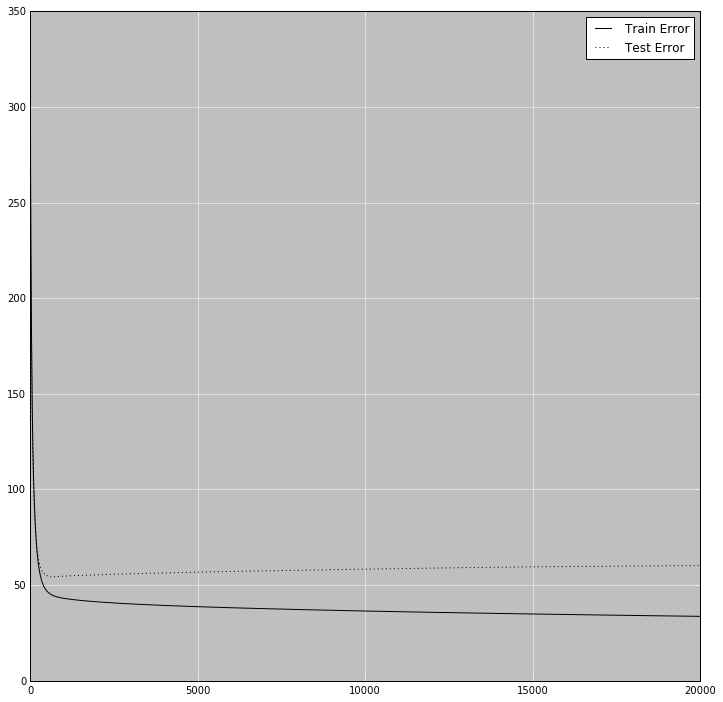

In [62]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
linestyles = ['-', '--', '-.', ':', (5, (3, 3, 1, 3))]
gb = GradientBoostingRegressor(learning_rate=0.1, n_estimators=20000, max_depth=1)
gb.fit(x, y.reshape(-1,))
lr = 0.1
plot_error(ax, gb, x, y, linestyle=linestyles[0], color='k', label='Train Error'.format(lr))
plot_error(ax, gb, x, test_data, linestyle=linestyles[3], color='k', label='Test Error'.format(lr))
set_ax_prop(ax, set_xlims=False, legend=True, add_text=False)

(0, 5000)

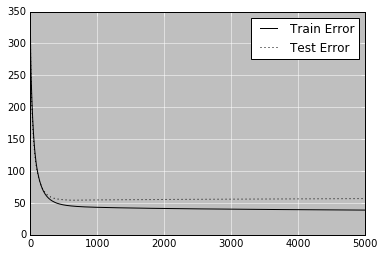

In [64]:
fig, ax = plt.subplots(1,1)
plot_error(ax, gb, x, y, linestyle=linestyles[0], color='k', label='Train Error'.format(lr))
plot_error(ax, gb, x, test_data, linestyle=linestyles[3], color='k', label='Test Error'.format(lr))
set_ax_prop(ax, set_xlims=False, legend=True, add_text=False)
ax.set_xlim(0, 5000)

In [65]:
gb_models = []
for i, lr in enumerate([1,0.3,0.1,0.03,0.01]):
    gb = GradientBoostingRegressor(learning_rate=lr, n_estimators=20000, max_depth=1)
    gb.fit(x, y.reshape(-1,))
    gb_models.append(gb)

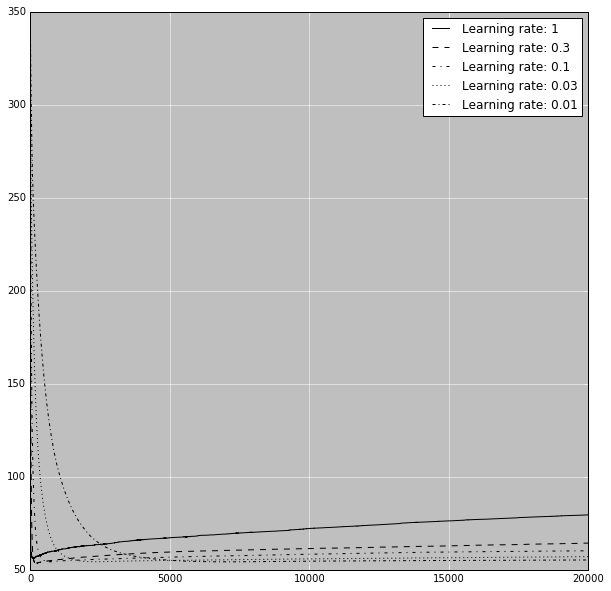

In [66]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
linestyles = ['-', '--', '-.', ':', (5, (3, 3, 1, 3))]
for i, lr in enumerate([1,0.3,0.1,0.03,0.01]):
    plot_error(ax, gb_models[i], x, test_data, linestyle=linestyles[i], color='k', label='Learning rate: {}'.format(lr))
set_ax_prop(ax, set_xlims=False, legend=True, add_text=False)
# ax.set_xlim(7000, 20000)
# ax.set_ylim(0, 25)

(50, 100)

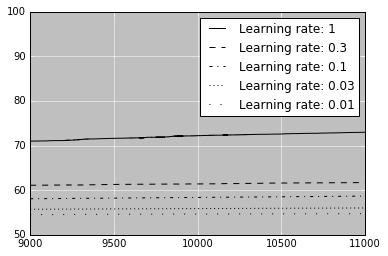

In [68]:
fig, ax = plt.subplots(1,1)
linestyles = ['-', '--', '-.', ':', (5, (1, 10, 1, 10))]
for i, lr in enumerate([1,0.3,0.1,0.03,0.01]):
    plot_error(ax, gb_models[i], x, test_data, linestyle=linestyles[i], color='k', label='Learning rate: {}'.format(lr))
set_ax_prop(ax, set_xlims=False, legend=True, add_text=False)
ax.set_xlim(9000, 11000)
ax.set_ylim(50, 100)

In [69]:
def find_optimal_estimators(model, X_new, y_new):
    validation_loss = np.zeros(model.get_params()['n_estimators'])
    for i, preds in enumerate(model.staged_predict(X_new)):
        validation_loss[i] = model.loss_(preds, y_new)
    optimal_tree = np.argmin(validation_loss)
    optimal_loss = validation_loss[optimal_tree]
    return optimal_tree, optimal_loss

In [70]:
from copy import deepcopy
def truncate_model(model, new_estimators):
    new_model = deepcopy(model)
    new_model.estimators_ = model.estimators_[:new_estimators,:]
    new_model.n_estimators = new_estimators
    del model
    return new_model

In [71]:
find_optimal_estimators(gb, x, test_data)

(6955, 0.090471327939455129)

In [74]:
for model in gb_models:
    print find_optimal_estimators(model, x, test_data)

(82, 0.093563172194521801)
(197, 0.088846612242050718)
(648, 0.090437656364304314)
(2311, 0.090485229772538575)
(6955, 0.090471327939455129)


In [72]:
gb.get_params()

{'alpha': 0.9,
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
test = truncate_model(gb, 10983)

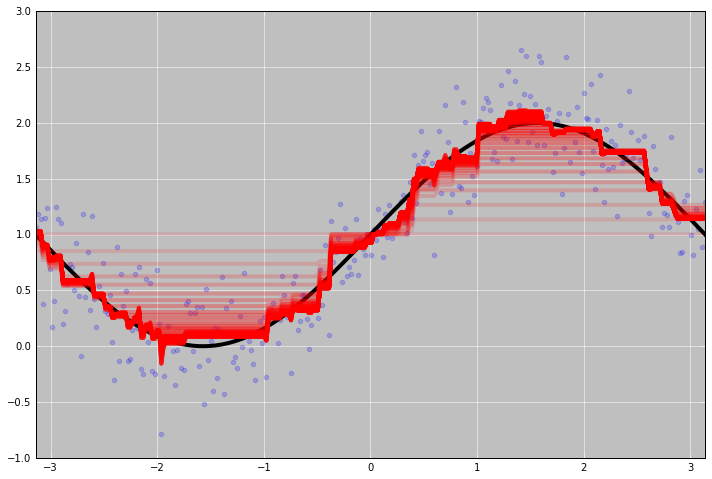

In [76]:
gbr = GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, max_depth=2)
gbr.fit(x,y.reshape(-1,))

# r, c = make_grid(360)
fig, ax = plt.subplots(1, 1, figsize=(12,8))
plot_data(ax, x, y, gen_func)
for i, result in enumerate(gbr.staged_predict(x)):
    if i % 10 == 0:
        plot_staged(ax, result, x, alpha = 0.1 + i/360.) 
        set_ax_prop(ax, add_text=False)

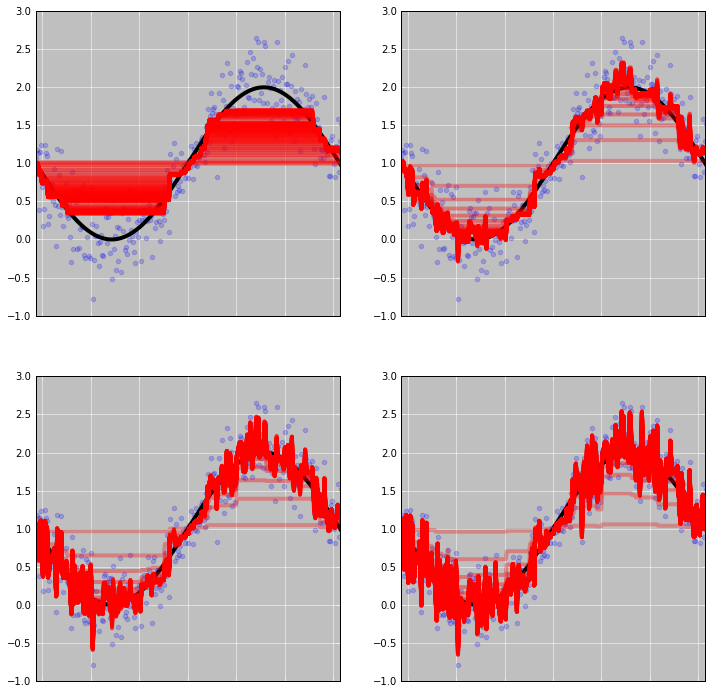

In [77]:
fig, ax_list = plt.subplots(2, 2, figsize=(12,12))
axes = ax_list.flatten()
depths = [1, 3, 5, 7]
for i, ax in enumerate(axes):
    gbr = GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, max_depth=depths[i])
    gbr.fit(x,y.reshape(-1,))

    plot_data(ax, x, y, gen_func)
    for j, result in enumerate(gbr.staged_predict(x)):
        if j % 10 == 0:
            plot_staged(ax, result, x, alpha = 0.3 + j/360.) 
    set_ax_prop(ax, 0, 0, 1, 4, add_text = False)

In [78]:
from sklearn.grid_search import GridSearchCV

In [79]:
param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [3, 5, 7],
              'min_samples_leaf': [3, 5, 9, 17],
              'max_features': [1., 0.3, 0.1],
              'subsample': [1., 0.3, 0.1],
              'n_estimators': [3000]
             }
param_grid = {'learning_rate': [0.1, 0.01],
              'max_depth': [3, 7],
              'min_samples_leaf': [3, 17],
              'max_features': [0.3, 0.1],
              'subsample': [0.3, 0.1],
              'n_estimators': [3000]
             }
est = GradientBoostingRegressor()
search = GridSearchCV(est, param_grid)

In [80]:
%timeit 
search.fit(x, y.reshape(-1,))

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.01], 'min_samples_leaf': [3, 17], 'n_estimators': [3000], 'subsample': [0.3, 0.1], 'max_features': [0.3, 0.1], 'max_depth': [3, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [81]:
search.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'max_features': 0.3,
 'min_samples_leaf': 17,
 'n_estimators': 3000,
 'subsample': 0.1}

In [104]:
rs()

'Kurt Ruegg'

# Visualization of Adaboost

![stuff](adaboost.png/adaboost.png.001.png "adaboost")

In [99]:
def plot_alpha_func():
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    data = np.linspace(0.001,0.999,1000)
    ax.plot(data, 0.5 * np.log((1-data)/data),lw=4)
    ax.hlines(0,0,1,lw=4)
    set_ax_prop(ax, add_text=False, set_xlims=False)
    ax.set_xticks([x/10. for x in range(11)])

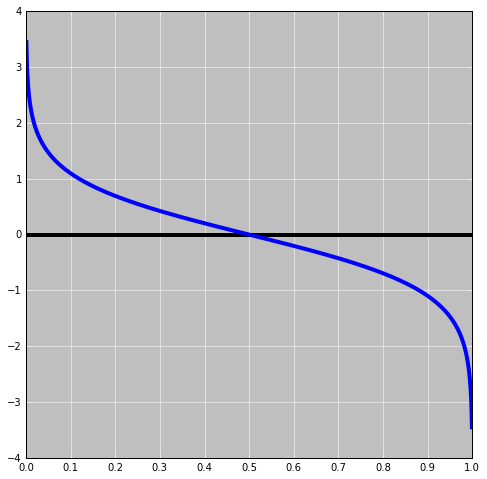

In [98]:
plot_alpha_func()